# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  데이터 수집

In [4]:
#데이터셋을 로드
from sklearn.datasets import load_boston
boston = load_boston()

####  데이터 이해

In [5]:
#데이터셋 정보확인
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

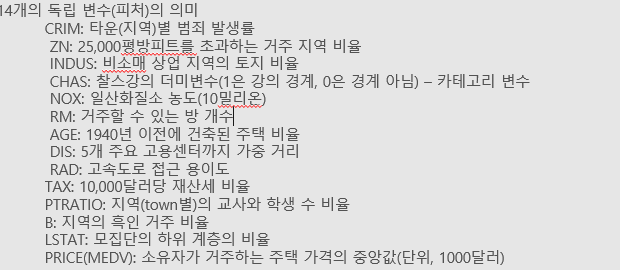

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인




In [10]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가

In [11]:
boston_df["PRICE"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#데이터의 크기와 형태를 확인
boston_df.shape

(506, 14)

In [13]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [14]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.

In [15]:
boston_df.drop('CHAS', axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
import seaborn as sns

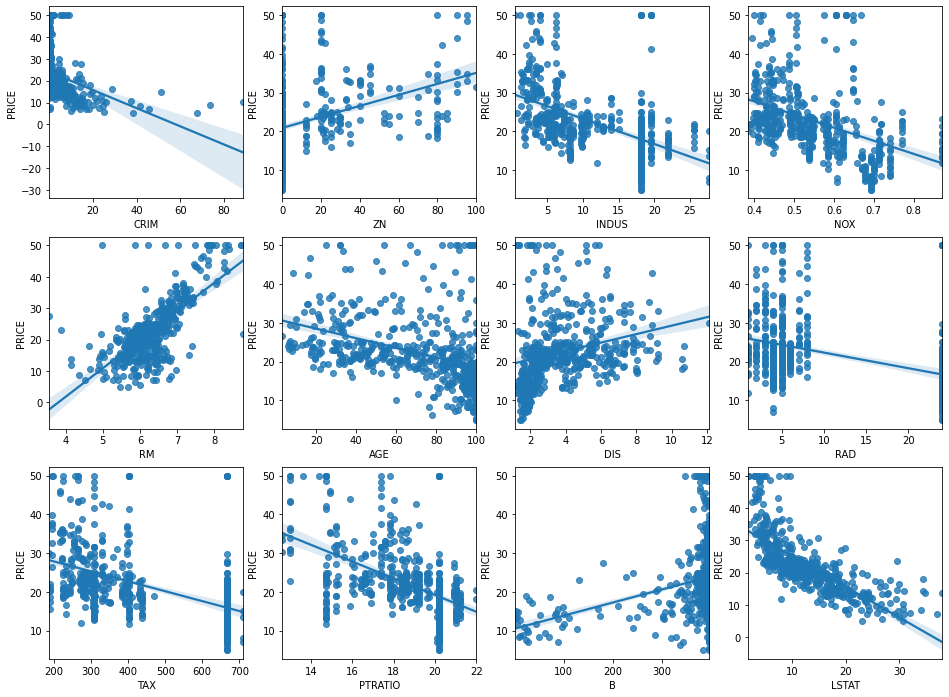

In [17]:
#3행 4열의 subplots을 준비
fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=4)

x_features = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i, feature in enumerate(x_features):
    #현재 subplot의 행,열 번호 갱신
    row = int(i/4)
    col = i%4
    #산점도와 회귀선 시각화
    sns.regplot(x=feature, y='PRICE', data=boston_df,ax=axs[row][col])

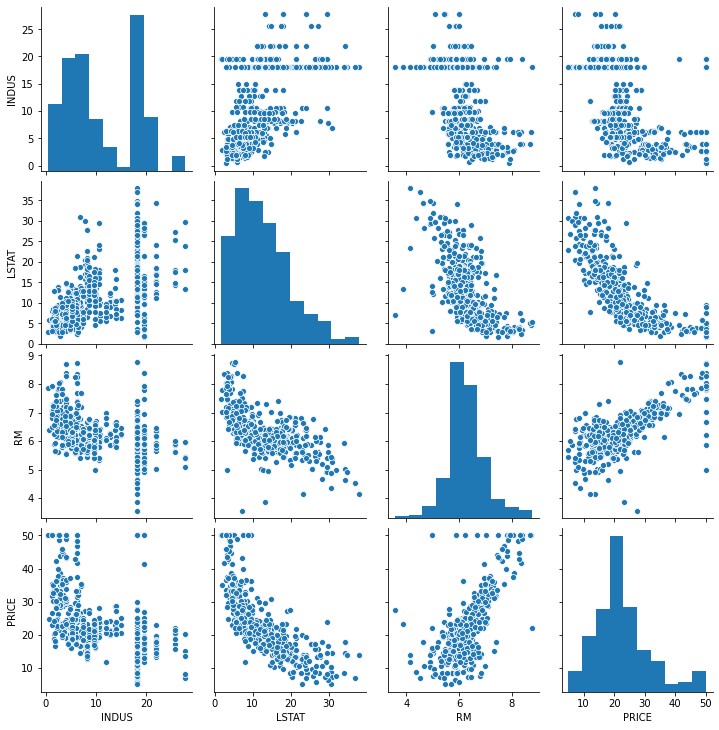

In [18]:
ccol = ['INDUS','LSTAT','RM','PRICE']

#pairplot 시각화
sns.pairplot(boston_df[ccol])

#sns.pairplot(boston_df, vars=ccol)

In [19]:
corrs = boston_df[ccol].corr()
corrs

,INDUS,LSTAT,RM,PRICE
INDUS,1.000000,0.603800,-0.391676,-0.483725
LSTAT,0.603800,1.000000,-0.613808,-0.737663
RM,-0.391676,-0.613808,1.000000,0.695360
PRICE,-0.483725,-0.737663,0.695360,1.000000


In [20]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)


In [21]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()

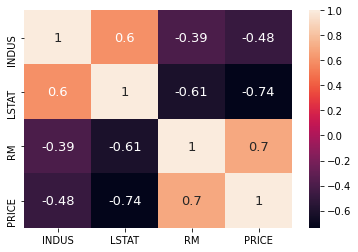

In [22]:
# annot : 히트맵 안에 주석(글)을 작성, annot_kws:annot작성시 글자크기
# 독립변수 간에 상관관계 커서 하나 탈락시킬 때 종속변수와 상관관계가 적은 것을 탈락시킴
sns.heatmap(corrs, annot=True, annot_kws={'size':13})

# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [23]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

### 데이터 준비

#### 데이터 분할

In [24]:
from sklearn.model_selection import train_test_split

#X,y 분할
X = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

#train, test 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [25]:
#X_train 데이터 일부 확인
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


### 모델 클래스 선택

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### 모델 구축 

In [27]:
#학습 수행
reg =lr.fit(X_train,y_train)

y_pred = reg.predict(X_test)


### 모델 평가

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rems = np.sqrt(mse)

r2=r2_score(y_test, y_pred)

In [29]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n=len(X_train)

#독립변수의 갯수
k= len(X_train.columns)
# 수정된 결정 계수
adj_r2 = 1- ((1-r2)*(n-1)/(n-k-1))

print(adj_r2)

0.6985671259060139


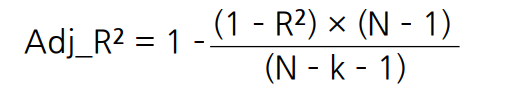

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [30]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦

#ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress=True)

#회귀 계수와 절편 값 확인
print("Y 절편 :", reg.intercept_)
print("회귀계수 : ", reg.coef_)

Y 절편 : 31.42847948230245
회귀계수 :  [ -0.14247725   0.03845719   0.07276282 -14.90079947   4.1464838
  -0.00901593  -1.41812295   0.27701153  -0.01025733  -0.93673815
   0.01274039  -0.56614311]


In [31]:
coef = pd.Series(np.round(reg.coef_, 3), index=X.columns)

print('y = ', str(reg.intercept_),'+')

for i,c in zip(coef.index, coef.values):
    print('(',str(c),')',str(i))

y =  31.42847948230245 +
( -0.142 ) CRIM
( 0.038 ) ZN
( 0.073 ) INDUS
( -14.901 ) NOX
( 4.146 ) RM
( -0.009 ) AGE
( -1.418 ) DIS
( 0.277 ) RAD
( -0.01 ) TAX
( -0.937 ) PTRATIO
( 0.013 ) B
( -0.566 ) LSTAT


###  실제값과 예측값의 분포차이를 시각화

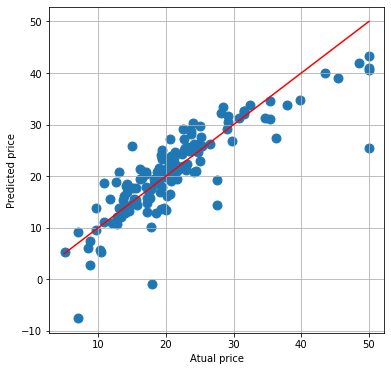

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s= 80)
plt.plot([5,50],[5,50],c='red')
plt.xlabel('Atual price')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [33]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.
import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train,X_train).fit()  #//학습완료


# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)
#평가 지표 값 확인
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     79.49
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           4.52e-91
Time:                        18:46:55   Log-Likelihood:                -1058.4
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     341   BIC:                             2193.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4285      6.126      5.130      0.0

# [응용1]: 다중 선형회귀 연습- load_diabetes

### 필요한 모듈 import

### 데이터 수집

In [34]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()

In [35]:
### 데이터 이해

In [36]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### 데이터 준비

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# X(독립변수), Y(종속변수) 분할
X= diab.data
y= diab.target
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [39]:
### 모델 구축
from sklearn.linear_model import LinearRegression


# 회귀 모델 객체 생성
lr = LinearRegression()

#학습 수행
reg = lr.fit(X_train,y_train)

#회귀계수 및 회귀식
print('Y절편 :', reg.intercept_)
print('회귀계수 :', reg.coef_)

coef = pd.Series(np.round(reg.coef_,3), index = diab.feature_names)

print('y = ', str(reg.intercept_),'+')
for i,j in zip(coef.index, coef.values):
    print('(',str(i),'*',str(j),')')

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

### 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

#데이터의 크기
n=len(X_train)

#독립변수의 갯수
k= 10

# 수정된 결정 계수
adj_r2 = 1- ((1-r2)*(n-1)/(n-k-1))

print('adj_r2 :',adj_r2)

Y절편 : 152.62754194200335
회귀계수 : [ -31.80536962 -214.67167622  445.13750645  376.35494358 -802.45172889
  525.95185517  106.39967097  172.31122486  799.47904182   57.16768747]
y =  152.62754194200335 +
( age * -31.805 )
( sex * -214.672 )
( bmi * 445.138 )
( bp * 376.355 )
( s1 * -802.452 )
( s2 * 525.952 )
( s3 * 106.4 )
( s4 * 172.311 )
( s5 * 799.479 )
( s6 * 57.168 )
adj_r2 : 0.4845258801086638


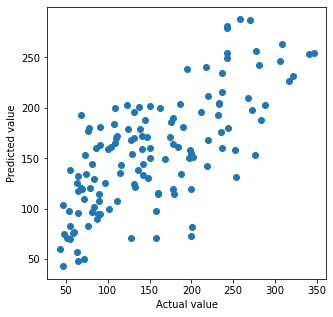

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

# [응용2] 캘리포니아 주택 가격

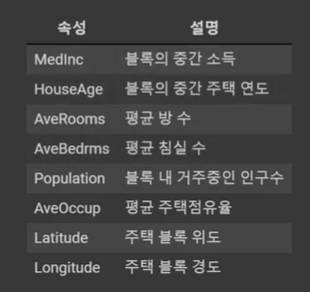

### 데이터 수집 및 탐색

In [41]:
#fetch data이므로 온라인으로만 fetch가능
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block gro

In [42]:
# 샘플:20640

In [43]:
#속성 :8개

# 시각화로 탐색

In [44]:
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Price'] = california.target
california_df.head()

california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


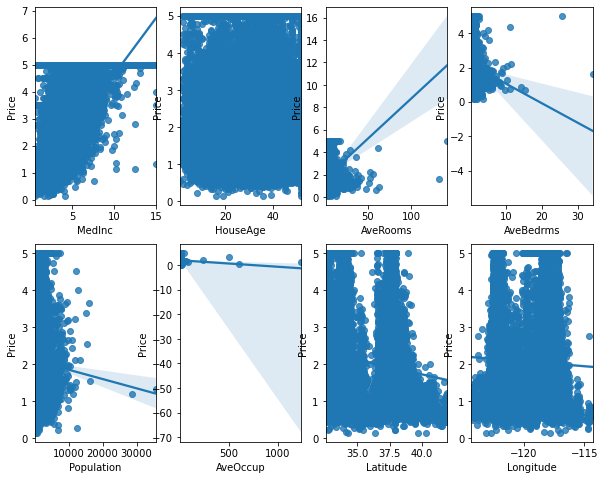

In [45]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색
import matplotlib.pyplot as plt
import seaborn as sns

ccol = california_df.columns

fig, axs = plt.subplots(figsize=(10,8), nrows=2,ncols=4)

x_features = california.feature_names

for i, feature in enumerate(x_features):
    row = int (i/4)
    col = i%4
    sns.regplot(x=feature, y="Price", data=california_df, ax=axs[row][col])

In [46]:
# 독립변수 간 상관관계 확인

In [47]:
california_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


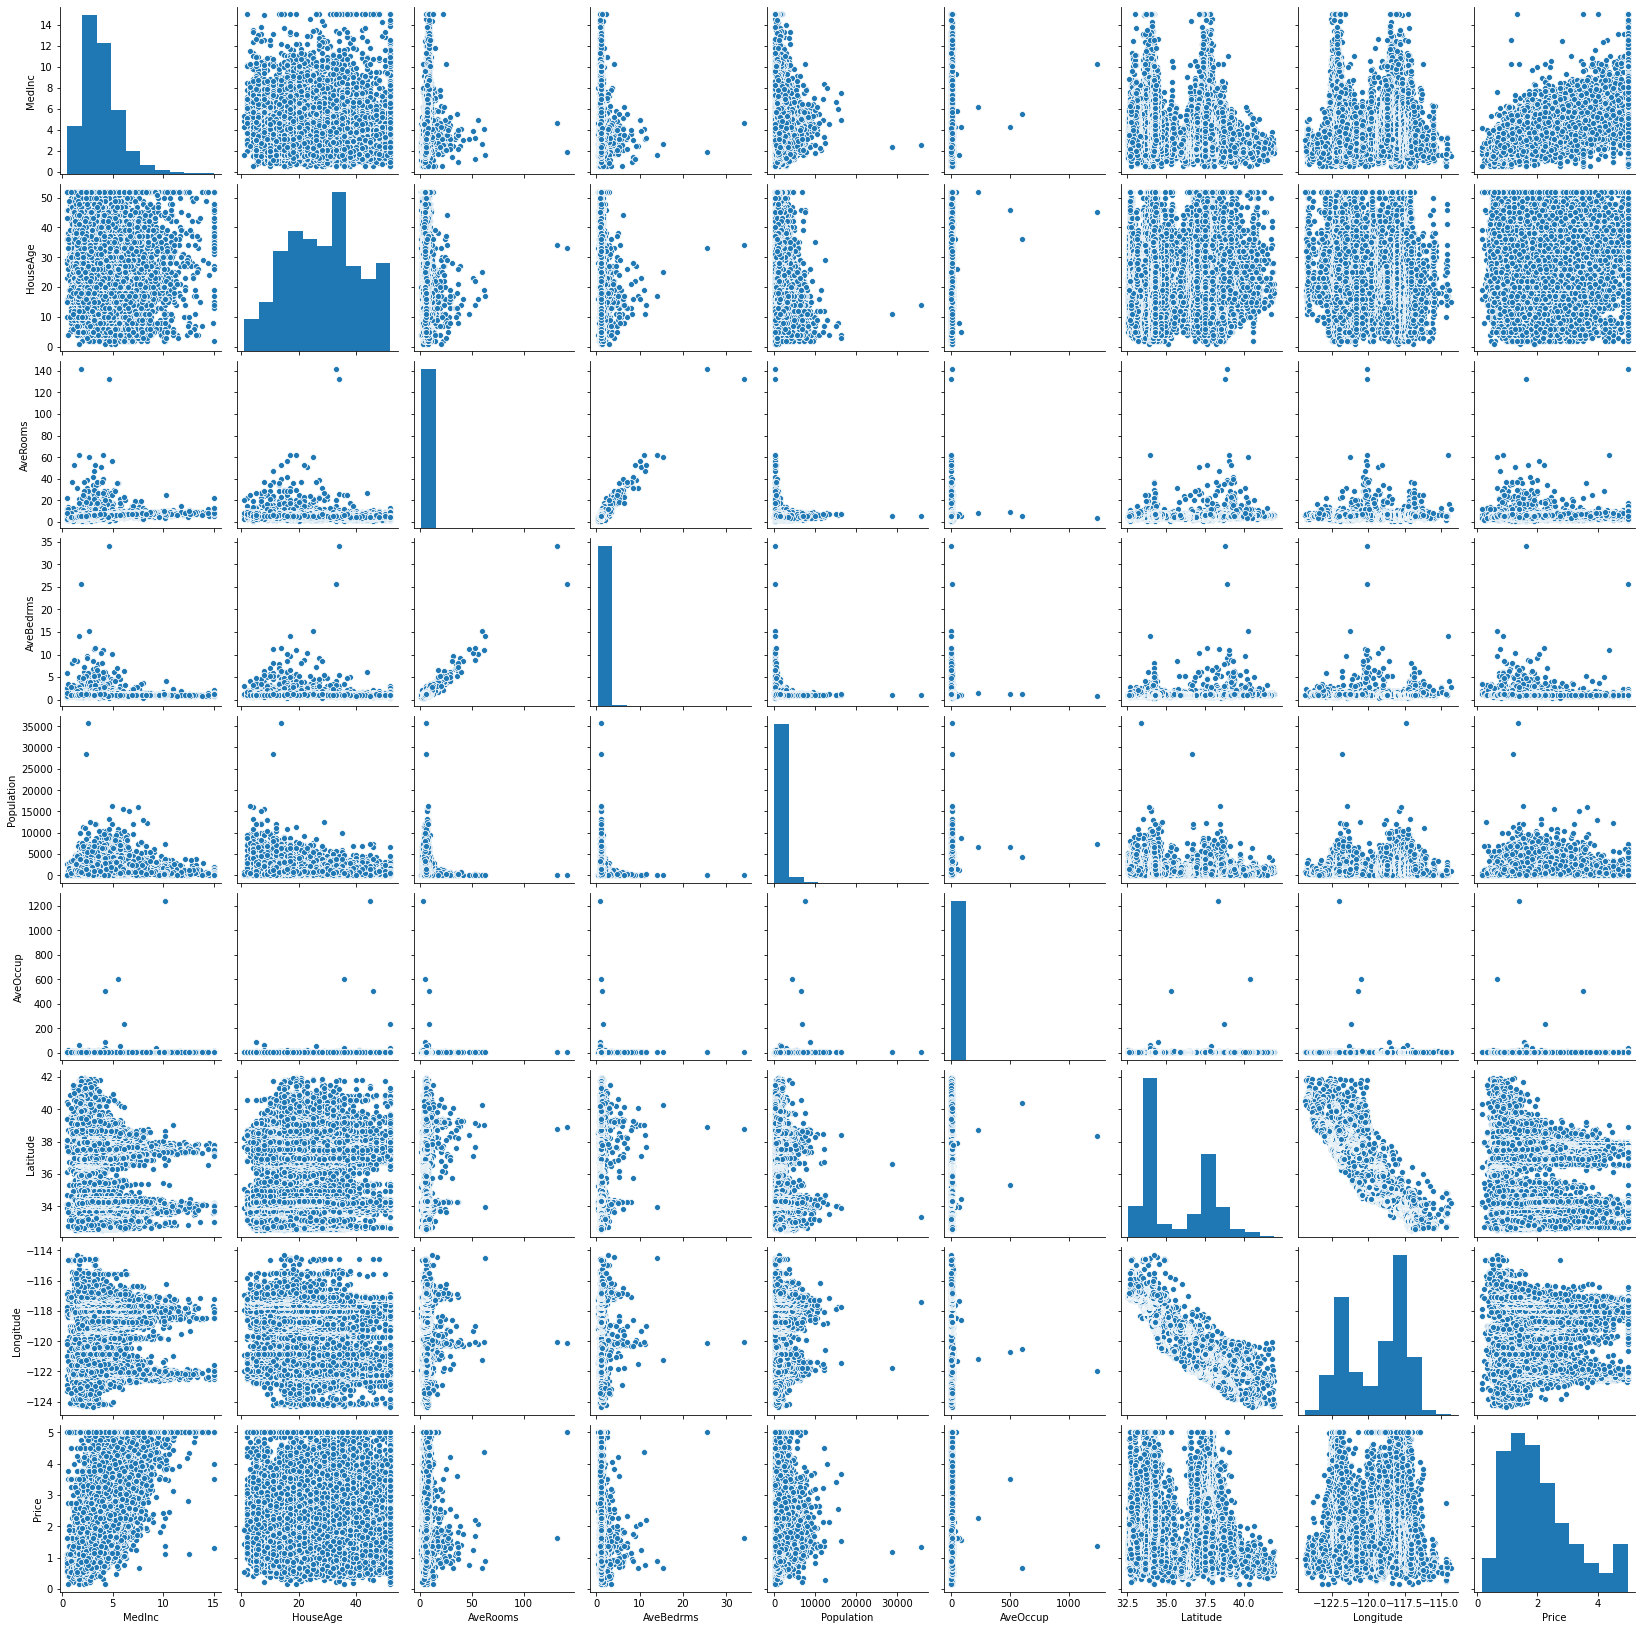

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
ccol = california_df.columns

#pairplot 시각화
sns.pairplot(california_df[ccol])


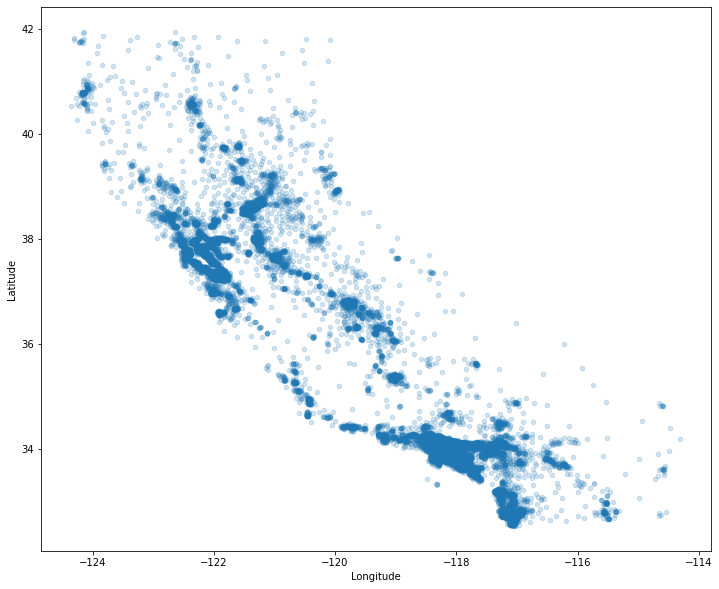

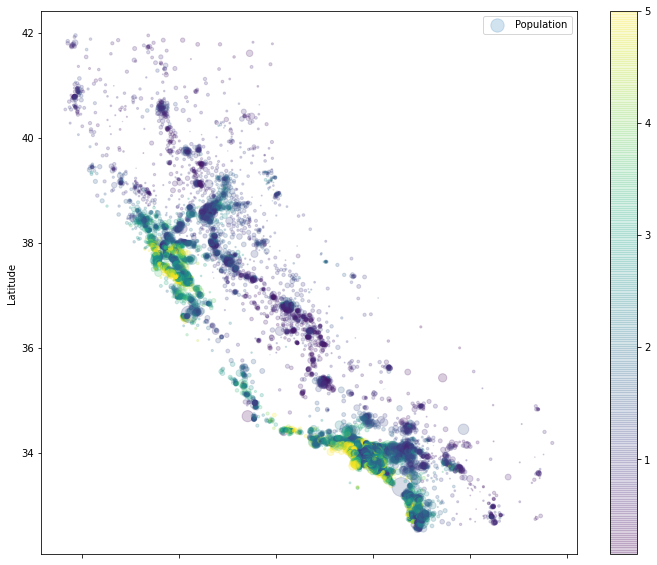

In [63]:
# 위경도 데이터 시각화
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, s=california_df['Population']/100,
                   figsize=(12, 10), label='Population', c=california_df['Price'], cmap=plt.get_cmap('viridis'),
                  colorbar=True);

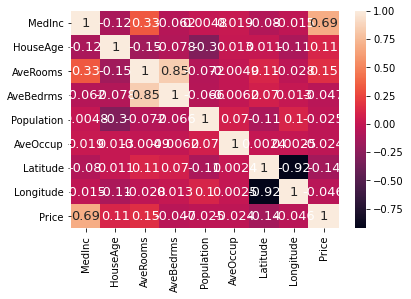

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#상관 계수 값에 대한 히트맵
sns.heatmap(california_df.corr(), annot=True, annot_kws={'size':13})


y= -37.51575415983683 +
0.43856539194251215 * MedInc
0.009687220371644018 * HouseAge
-0.10470500491383802 * AveRooms
0.6321894737661224 * AveBedrms
-3.676907109216934e-06 * Population
-0.003447713225175921 * AveOccup
-0.425964055525606 * Latitude
-0.4406011141308219 * Longitude


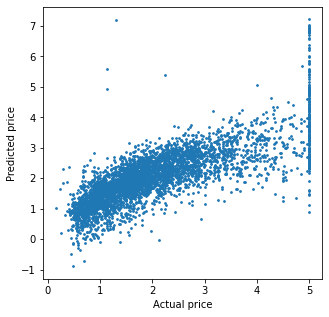

In [96]:
# 선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

#train.test set 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

#LinearRegression
lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)
# 회귀식으로 표현
reg.coef_, reg.intercept_

print('y=',reg.intercept_,'+')
for index,value in enumerate(reg.coef_):
    print(value,'*',california.feature_names[index])

# 결과 시각화 ( actual price VS predicted price)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred, s=3)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:3f}".format(r2))

MSE: 0.529, RMSE: 0.727
R2: 0.596597


In [94]:
X_train.shape

(16512, 8)

In [98]:

# 수정된 결정 계수 확인(Ajusted-R2)
n=len(X_train) # 데이터 크기
k=8 #독립변수 개수
adj_r2 = 1-((1-r2)*(n-1)/(n-k-1))

#데이터의 크기


#독립변수의 갯수


# 수정된 결정 계수

print("Adjusted R2: {:.4f} ".format(adj_r2))

Adjusted R2: 0.5964 
